In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_circles

In [10]:
np.random.seed(0)
n = 900
X = make_circles(n_samples=n, noise=0.1, factor=0.9999, random_state=0)[0]

X_train = X

X_outliers1 = make_circles(n_samples=int(0.8*(n)/9), noise=0.2, factor=0.9999, random_state=0)[0]*2
X_outliers2 = make_circles(n_samples=int(0.2*(n)/9), noise=0.7, factor=0.9999, random_state=0)[0]*0.25
X_outliers = np.r_[X_outliers1, X_outliers2]

X_test = make_circles(n_samples=n, noise=0.1, factor=0.9999, random_state=1)[0]

X_test_with_outliers = np.r_[X_test, X_outliers]

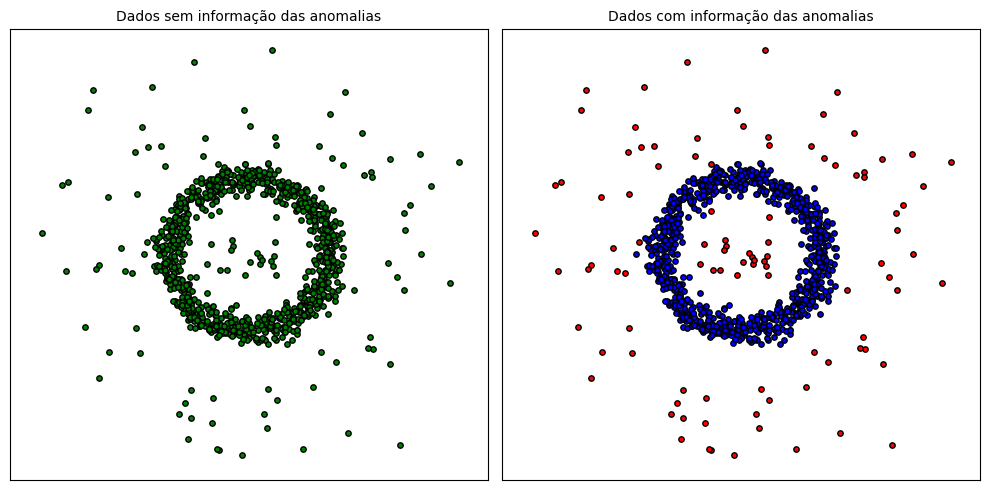

In [11]:
fig, axes = plt.subplots(1,2,figsize=(10, 5))

axes[0].scatter(X_test_with_outliers[:, 0], X_test_with_outliers[:, 1], s=15, c='green', edgecolors='k')
axes[0].set_xlim((-3, 3))
axes[0].set_ylim((-3, 3))
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].set_title("Dados sem informação das anomalias", fontsize=10)

axes[1].scatter(X_test[:, 0], X_test[:, 1], s=15, c='blue', edgecolors='k')
axes[1].scatter(X_outliers[:, 0], X_outliers[:, 1], s=15, c='red', edgecolors='k')
axes[1].set_xlim((-3, 3))
axes[1].set_ylim((-3, 3))
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].set_title("Dados com informação das anomalias", fontsize=10)

plt.tight_layout()
plt.savefig('data_one_class_svm.svg',bbox_inches='tight')
plt.show()

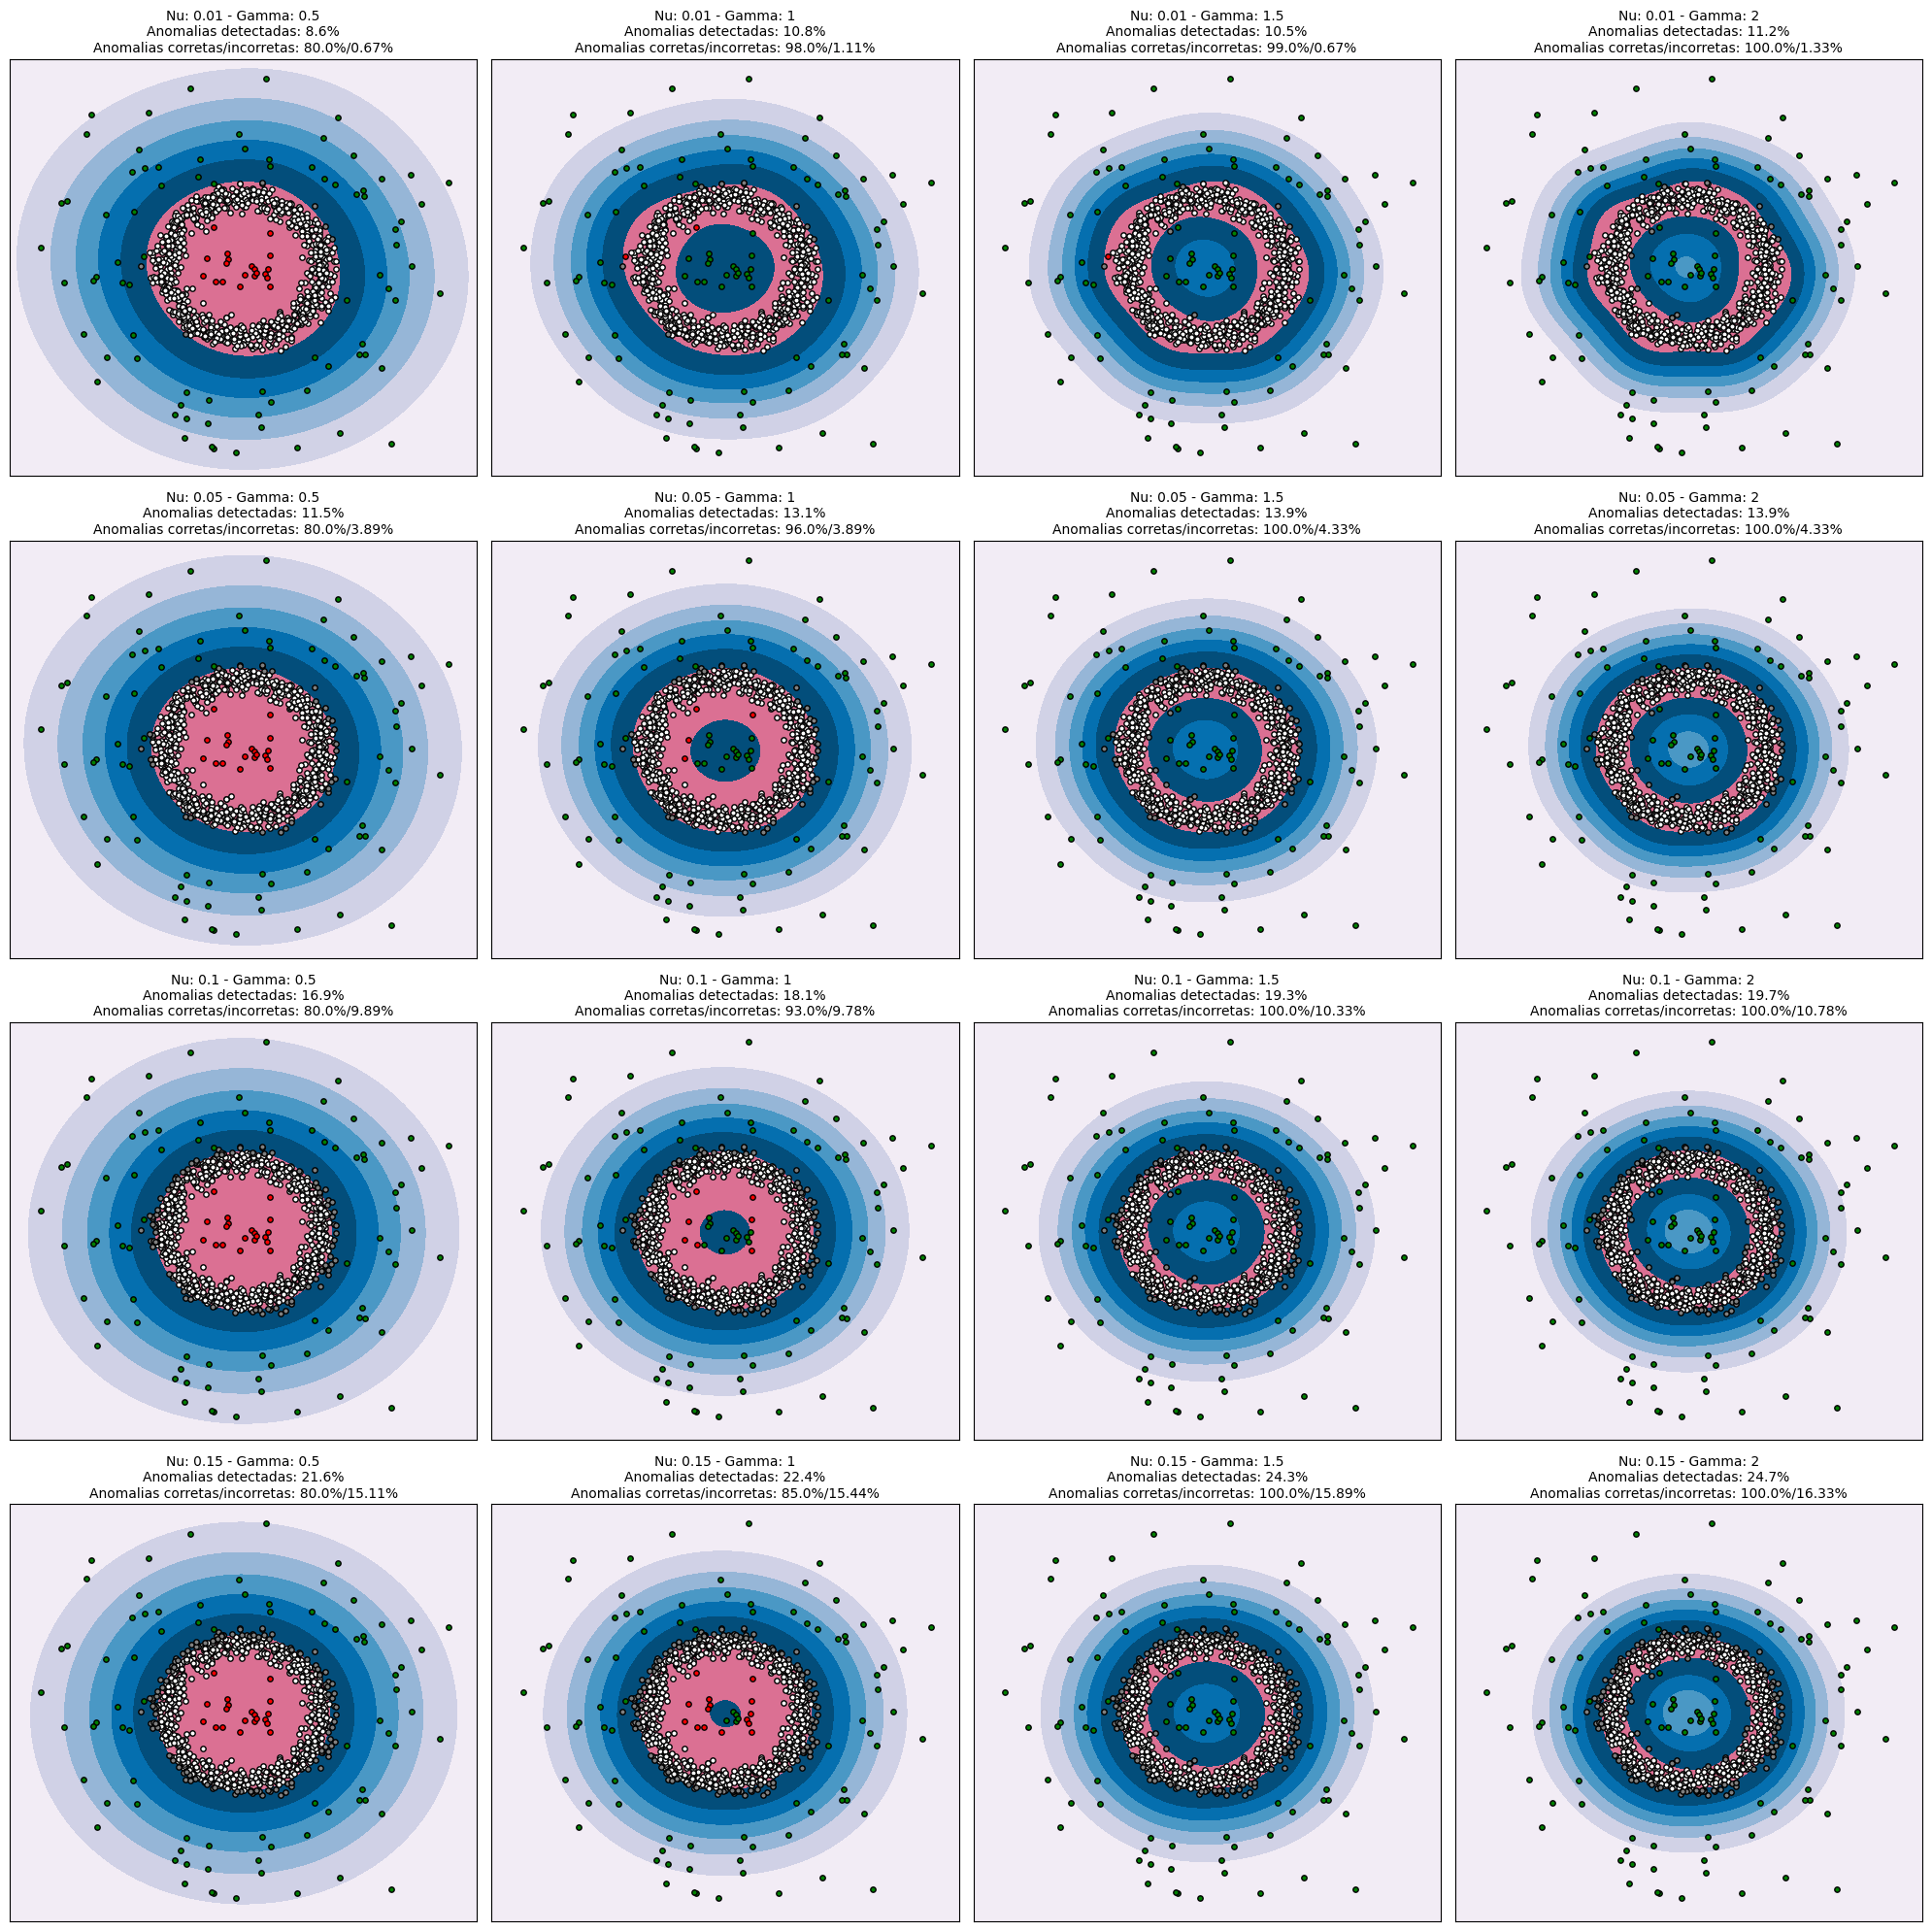

In [12]:
params = [(0.01,0.5),(0.01,1),(0.01,1.5),(0.01,2),
          (0.05,0.5),(0.05,1),(0.05,1.5),(0.05,2),
          (0.10,0.5),(0.10,1),(0.10,1.5),(0.10,2),
          (0.15,0.5),(0.15,1),(0.15,1.5),(0.15,2)]

# Plotar os resultados
fig, axes = plt.subplots(4,4,figsize=(20, 20))

c1 = 0
c2 = 0
for j in params:

  svm_model = OneClassSVM(kernel='rbf', nu=j[0], gamma=j[1])
  svm_model.fit(X_train)

  y_pred = svm_model.predict(X_test_with_outliers)

  # Criar uma malha para plotar a fronteira de decisão
  xx, yy = np.meshgrid(np.linspace(-4, 4, 500), np.linspace(-4, 4, 500))
  Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plotar a fronteira de decisão e as margens
  axes[c1,c2].contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
  axes[c1,c2].contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

  # Plotar os pontos de dados
  s = 15
  normal_corect_mask = y_pred[:n] == 1
  normal_incorrect_mask = y_pred[:n] == -1
  outlier_corect_mask = y_pred[n:] == -1
  outlier_incorrect_mask = y_pred[n:] == 1
  axes[c1,c2].scatter(X_test[normal_corect_mask, 0], X_test[normal_corect_mask, 1], c='white', s=s, edgecolors='k')
  axes[c1,c2].scatter(X_test[normal_incorrect_mask, 0], X_test[normal_incorrect_mask, 1], c='gray', s=s, edgecolors='k')
  axes[c1,c2].scatter(X_outliers[outlier_corect_mask, 0], X_outliers[outlier_corect_mask, 1], c='green', s=s, edgecolors='k')
  axes[c1,c2].scatter(X_outliers[outlier_incorrect_mask, 0], X_outliers[outlier_incorrect_mask, 1], c='red', s=s, edgecolors='k')

  axes[c1,c2].set_xlim((-3, 3))
  axes[c1,c2].set_ylim((-3, 3))

  axes[c1,c2].set_xticks([])
  axes[c1,c2].set_yticks([])

  axes[c1,c2].set_title(
      f"Nu: {j[0]} - Gamma: {j[1]}\n"
      f"Anomalias detectadas: {np.round(100*sum(y_pred == -1)/len(y_pred),2)}%\n"
      f"Anomalias corretas/incorretas: {np.round(100*sum(outlier_corect_mask)/len(X_outliers),2)}%/{np.round(100*sum(normal_incorrect_mask)/n,2)}%",
      fontsize=10
  )

  c2 += 1
  if c2 == 4:
    c2 = 0
    c1 += 1

plt.tight_layout()
plt.savefig('one_class_svm.svg',bbox_inches='tight')
plt.show()